# Data Processing

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# load data
dataset = pd.read_csv('/content/drive/My Drive/data/forex/HISTDATA_COM_MT_EURUSD_M12012/DAT_MT_EURUSD_M1_2012.csv', header=None, names=['date','hour','open','high','low','close','volume'])

In [0]:
dataset = dataset.fillna(method='ffill')

In [29]:
dataset.describe()

,open,high,low,close,volume
count,372161.000000,372161.000000,372161.000000,372161.000000,372161.0
mean,1.285481,1.285586,1.285376,1.285481,0.0
std,0.032703,0.032704,0.032703,0.032703,0.0
min,1.204480,1.204740,1.204140,1.204500,0.0
25%,1.258180,1.258300,1.258070,1.258180,0.0
50%,1.292970,1.293060,1.292880,1.292970,0.0
75%,1.312350,1.312470,1.312240,1.312350,0.0
max,1.348440,1.348560,1.348390,1.348430,0.0


In [30]:
 dataset.head(4)

,date,hour,open,high,low,close,volume
0,2012.01.02,02:00,1.29324,1.29381,1.29324,1.29332,0
1,2012.01.02,02:01,1.29326,1.29345,1.29275,1.29341,0
2,2012.01.02,02:02,1.29342,1.29344,1.29341,1.29343,0
3,2012.01.02,02:03,1.29342,1.29342,1.29335,1.29336,0


In [31]:
dataset.loc[1:2]

,date,hour,open,high,low,close,volume
1,2012.01.02,02:01,1.29326,1.29345,1.29275,1.29341,0
2,2012.01.02,02:02,1.29342,1.29344,1.29341,1.29343,0


In [32]:
type(dataset)

pandas.core.frame.DataFrame

In [33]:
dataset.columns

Index(['date', 'hour', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [34]:
dataset['open'].values

array([1.29324, 1.29326, 1.29342, ..., 1.31935, 1.31927, 1.31951])

In [0]:
minimized_ds = dataset.loc[dataset['hour'].isin(['00:00'])]

In [0]:
all_values = minimized_ds.iloc[:,2:6].values

In [0]:
# create the training set and test set
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(minimized_ds, test_size=0.05, shuffle=False)
training_set = train_df.iloc[:, 2:6].values
test_set = test_df.iloc[:, 2:6].values

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [39]:
training_set_scaled.shape

(245, 4)

In [0]:
predict_size = 40

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(predict_size, len(training_set)):
    X_train.append(training_set_scaled[i-predict_size:i, :])
    y_train.append(training_set_scaled[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

In [42]:
X_train.shape

(205, 40, 4)

In [43]:
y_train.shape

(205, 4)

# Training

In [44]:
X_train.shape[2]

4

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 4))

In [47]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 20)

Epoch 1/20
205/205 [==============================] - 5s 25ms/step - loss: 0.1728
Epoch 2/20
205/205 [==============================] - 3s 12ms/step - loss: 0.0590
Epoch 3/20
205/205 [==============================] - 2s 11ms/step - loss: 0.0530
Epoch 4/20
205/205 [==============================] - 2s 11ms/step - loss: 0.0345
Epoch 5/20
205/205 [==============================] - 2s 12ms/step - loss: 0.0317
Epoch 6/20
205/205 [==============================] - 2s 11ms/step - loss: 0.0281
Epoch 7/20
205/205 [==============================] - 2s 12ms/step - loss: 0.0276
Epoch 8/20
205/205 [==============================] - 2s 11ms/step - loss: 0.0258
Epoch 9/20
205/205 [==============================] - 2s 12ms/step - loss: 0.0253
Epoch 10/20
205/205 [==============================] - 3s 12ms/step - loss: 0.0226
Epoch 11/20
205/205 [==============================] - 2s 12ms/step - loss: 0.0245
Epoch 12/20
205/205 [==============================] - 3s 13ms/step - loss: 0.0230
Epoch 13/20
2

# Making prediction and visualizing data

In [0]:
inputs = np.concatenate((training_set[-(predict_size):],test_set))

In [49]:
inputs.shape

(53, 4)

In [0]:
inputs = sc.transform(inputs)

In [0]:
real_stock_price = test_set

In [0]:
X_test = []
for i in range(predict_size, len(inputs)):
    X_test.append(inputs[i-predict_size:i, :])
X_test = np.array(X_test)

In [53]:
X_test.shape

(13, 40, 4)

In [0]:
# get predicted price
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [55]:
predicted_stock_price.shape

(13, 4)

In [56]:
real_stock_price[:,0]

array([1.29491, 1.29966, 1.3083 , 1.30871, 1.31626, 1.31727, 1.32482,
       1.32215, 1.31927, 1.31839, 1.32312, 1.32423, 1.31967])

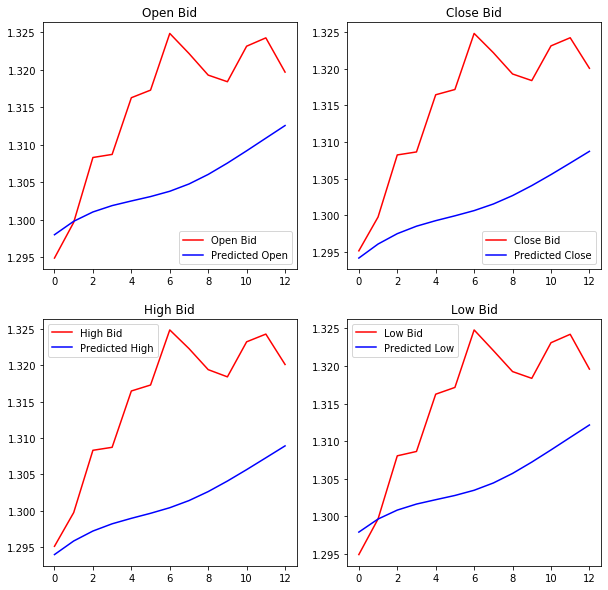

In [68]:
# Visualising the results
plt.figure(figsize=(10,10))
# Open bid
plt.subplot(221)
plt.plot(real_stock_price[:,0], color = 'red', label = 'Open Bid')
plt.plot(predicted_stock_price[:,0], color = 'blue', label = 'Predicted Open')
plt.title('Open Bid')
# plt.xlabel('Time')
# plt.ylabel('EURUSD Price')
plt.legend()

# Close bid
plt.subplot(222)
plt.plot(real_stock_price[:,3], color = 'red', label = 'Close Bid')
plt.plot(predicted_stock_price[:,3], color = 'blue', label = 'Predicted Close')
plt.title('Close Bid')
# plt.xlabel('Time')
# plt.ylabel('EURUSD Price')
plt.legend()

# High bid
plt.subplot(223)
plt.plot(real_stock_price[:,1], color = 'red', label = 'High Bid')
plt.plot(predicted_stock_price[:,1], color = 'blue', label = 'Predicted High')
plt.title('High Bid')
# plt.xlabel('Time')
# plt.ylabel('EURUSD Price')
plt.legend()

# Low bid
plt.subplot(224)
plt.plot(real_stock_price[:,2], color = 'red', label = 'Low Bid')
plt.plot(predicted_stock_price[:,2], color = 'blue', label = 'Predicted Low')
plt.title('Low Bid')
# plt.xlabel('Time')
# plt.ylabel('EURUSD Price')
plt.legend()

plt.show()

# Analysis model performance

In [58]:
type(predicted_stock_price)

numpy.ndarray

In [59]:
type(all_values)

numpy.ndarray

In [0]:
past_open_data = all_values[len(all_values)-len(test_set)-1:-1,0]

In [61]:
past_open_data.shape

(13,)

In [0]:
predicted_direction = np.sign(predicted_stock_price[:,0] - past_open_data)

In [0]:
actual_direction = np.sign(real_stock_price[:,0] - past_open_data)

In [64]:
# Calculate confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(actual_direction, predicted_direction) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_direction, predicted_direction))
print('Report : ')
print(classification_report(actual_direction, predicted_direction))

Confusion Matrix :
[[4 0]
 [6 3]]
Accuracy Score : 0.5384615384615384
Report : 
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57         4
         1.0       1.00      0.33      0.50         9

    accuracy                           0.54        13
   macro avg       0.70      0.67      0.54        13
weighted avg       0.82      0.54      0.52        13



In [65]:
# Calculate MSE of high and low bid
high_mse = ((predicted_stock_price[:,1] - real_stock_price[:,1])**2).mean(axis=0)
low_mse = ((predicted_stock_price[:,2] - real_stock_price[:,2])**2).mean(axis=0)
print("High bid MSE is: ", high_mse)
print("Low bid MSE is: ", low_mse)

High bid MSE is:  0.00023857759794326125
Low bid MSE is:  0.0001564952146477923


In [66]:
np.sign([1,1.1,-1.1])

array([ 1.,  1., -1.])